In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import xsmodels as xs

In [4]:
def makeSpec(e1=0.1, e2=10.0, nFlux=99):

    ebins = np.logspace(np.log10(e1), np.log10(e2), num=nFlux+1, base=10.0)
    
    kerrbbParams = np.array([0.0, 0.9, 60.0, 10.0, 1.0, 10.0, 1.7, 1.0, 0.0, 1.0])
    tbabsParams = np.array([1.0])
    
    fraw = np.zeros(nFlux)
    frawerr = np.zeros(nFlux)
    f = np.zeros(nFlux)
    ferr = np.zeros(nFlux)
    tbabs = np.zeros(nFlux)
    tbabserr = np.zeros(nFlux)
    
    xs.model("kerrbb", ebins, kerrbbParams, 0, fraw, frawerr)
    xs.model("tbabs", ebins, tbabsParams, 0, tbabs, tbabserr)
    
    f = tbabs * fraw
    ferr = f * (frawerr/fraw + tbabserr/tbabs)
    
    return ebins, f, ferr, fraw, frawerr

(0.0001, 1.0)

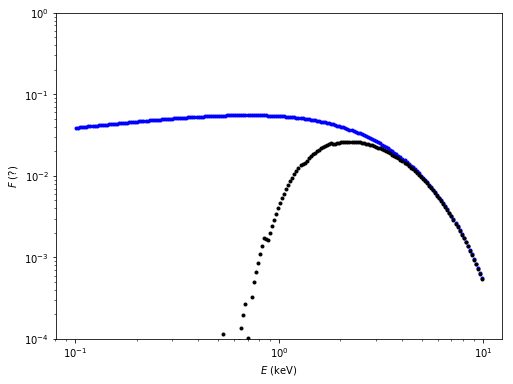

In [6]:
ebins, f, ferr, fraw, frawerr = makeSpec(nFlux=200)

en = 0.5*(ebins[:-1] + ebins[1:])

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(en, fraw, frawerr, fmt='b.', ecolor='b')
ax.errorbar(en, f, ferr, fmt='k.', ecolor='k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$E$ (keV)')
ax.set_ylabel(r'$F$ (?)')
ax.set_ylim(1.0e-4, 1.0)